## Sales Prediction for Big Mart Outlets using Regression 

### Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

### Data Description

In [1]:
#We have train (8523) and test (5681) data set, train data set has both input and output variable(s). 
#You need to predict the sales for test data set.

##Train file: CSV containing the item outlet information with sales value

#Variable	                               Description
#Item_Identifier	                 Unique product ID
#Item_Weight	                     Weight of product
#Item_Fat_Content	                 Whether the product is low fat or not
#Item_Visibility	                 The % of total display area of all products in a store allocated to the particular product
#Item_Type	                         The category to which the product belongs
#Item_MRP	                         Maximum Retail Price (list price) of the product
#Outlet_Identifier	                 Unique store ID
#Outlet_Establishment_Year	         The year in which store was established
#Outlet_Size	                     The size of the store in terms of ground area covered
#Outlet_Location_Type	             The type of city in which the store is located
#Outlet_Type	                     Whether the outlet is just a grocery store or some sort of supermarket
#Item_Outlet_Sales	                Sales of the product in the particular store. This is the outcome variable to be predicted.
 

#Test file: CSV containing item outlet combinations for which sales need to be forecasted

#Variable	                          Description
#Item_Identifier	                  Unique product ID
#Item_Weight	                      Weight of product
#Item_Fat_Content	                  Whether the product is low fat or not
#Item_Visibility	                 The % of total display area of all products in a store allocated to the particular product
#Item_Type	                          The category to which the product belongs
#Item_MRP	                          Maximum Retail Price (list price) of the product
#Outlet_Identifier	                  Unique store ID
#Outlet_Establishment_Year	          The year in which store was established
#Outlet_Size	                      The size of the store in terms of ground area covered
#Outlet_Location_Type	              The type of city in which the store is located
#Outlet_Type	                      Whether the outlet is just a grocery store or some sort of supermarket

In [2]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
%matplotlib inline

In [3]:
%cd "D:\Big Mart Sales Capstone Project"

D:\Big Mart Sales Capstone Project


-> Train file is complete data including dependent variable(y)

-> Test file will not have dependent variable(y) which needs to be predicted using model built on train data sample     submission file is where predictions are copied for uploading into competition site for checking the result and accuracy.

In [4]:
salestrain=pd.read_csv("train_XnW6LSF.csv")  # importing train file
salestest=pd.read_csv("test_FewQE9B.csv")    # importing test file

### Data Preprocessing and Exploratory Data Analysis

In [5]:
print(salestrain.shape) #size of the train file

(8523, 12)


In [6]:
print(salestest.shape)  #size of the test file

(5681, 11)


In [7]:
salestrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
salestrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
salestrain.isnull().sum() # checjing for missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
salestest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [11]:
salestest.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [12]:
salestest.isnull().sum() # cehcking for missing values

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

-> The train and test dataset have some missing values that need to be filled.

-> We will concatenate the test and train dataframes for data preprocessing, which requires the same number and order of variables in both dataframes.

-> Therefore, we will temporarily add a dependent variable to the test data for preprocessing purposes.

In [13]:
#Temporarly add dependent variable to test data for preprocessing
salestest['Item_Outlet_Sales']='test'

In [14]:
# Combine Both Dataframes for preprocessing
# For Concatenation of 2 dataframes the number of variables and squence of variables must be same.
combinedf=pd.concat([salestrain,salestest],axis=0)
# axis=0 is Row wise Concatenation
# axis=1 is Column wise Concatenation

In [15]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.4+ MB


In [16]:
combinedf.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
combinedf.Item_Weight.describe()

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

In [18]:
#mean imputation
combinedf.Item_Weight=combinedf.Item_Weight.fillna(combinedf.Item_Weight.mean())
# we are impotung the Item_Weight using the mean as it a numerical variable.

In [19]:
combinedf.Outlet_Size.value_counts(dropna=False)

Outlet_Size
Medium    4655
NaN       4016
Small     3980
High      1553
Name: count, dtype: int64

In [20]:
combinedf.Outlet_Size=combinedf.Outlet_Size.fillna("Missing")
#since missing values are very and cannot be imputed with existing levels,impute with word missing

In [21]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.4+ MB


In [22]:
combinedf.isnull().sum() # there are no missing values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [23]:
combinedf.Item_Fat_Content.value_counts(dropna =False)
# We can see that we have multiple duplicate data here, so we are using the replace function to correct them. 

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

In [24]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace(['LF','low fat'],'Low Fat')

In [25]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace('reg','Regular')

In [26]:
combinedf.Item_Fat_Content.value_counts(dropna=False) # no duplicate data

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

In [27]:
combinedf.Outlet_Establishment_Year.value_counts()
# As Outlet_Establishment_Year is a categorical data, but data type is in int64, we are changing the data type to object.

Outlet_Establishment_Year
1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: count, dtype: int64

In [28]:
# Create a new variable "Outlet_age" from Outlet_Establishment_year
combinedf["Outlet_Age"]=2022-combinedf.Outlet_Establishment_Year

In [29]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  object 
 12  Outlet_Age                 14204 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 1.5

In [30]:
# The Item_Identifier is a categorical, but we have huge number of categories, so we are creating created a new
#variable called item_code which is extraction of first 2 characters of item_identifier

combinedf['Item_code']=combinedf.Item_Identifier.apply(lambda x:x[0:2])

#lambda function is anoanymos function. Function without name. keyword lambda must be used for lambda arguments

In [31]:
combinedf.Item_code.value_counts(dropna=False) # FD- Food, DR-Drinks, NC-Non Consumable

Item_code
FD    10201
NC     2686
DR     1317
Name: count, dtype: int64

In [32]:
combinedf.loc[combinedf['Item_code']=='NC','Item_Fat_Content'] = "Non-Edible"
combinedf['Item_Fat_Content'].value_counts()
# As we have non consumable food, we are changing the far content as non-edible.

Item_Fat_Content
Low Fat       6499
Regular       5019
Non-Edible    2686
Name: count, dtype: int64

In [33]:
#Now we can drop the Item_Identifier variable as we created alternative variable.
combinedf=combinedf.drop(['Item_Identifier','Outlet_Establishment_Year'],axis=1)

In [34]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           14204 non-null  float64
 1   Item_Fat_Content      14204 non-null  object 
 2   Item_Visibility       14204 non-null  float64
 3   Item_Type             14204 non-null  object 
 4   Item_MRP              14204 non-null  float64
 5   Outlet_Identifier     14204 non-null  object 
 6   Outlet_Size           14204 non-null  object 
 7   Outlet_Location_Type  14204 non-null  object 
 8   Outlet_Type           14204 non-null  object 
 9   Item_Outlet_Sales     14204 non-null  object 
 10  Outlet_Age            14204 non-null  int64  
 11  Item_code             14204 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.4+ MB


In [35]:
#Descriptive statistics for numerical variables
combinedf.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
count,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,24.169319
std,4.234226,0.051459,62.086938,8.371664
min,4.555000,0.000000,31.290000,13.000000
25%,9.300000,0.027036,94.012000,18.000000
50%,12.792854,0.054021,142.247000,23.000000
75%,16.000000,0.094037,185.855600,35.000000
max,21.350000,0.328391,266.888400,37.000000


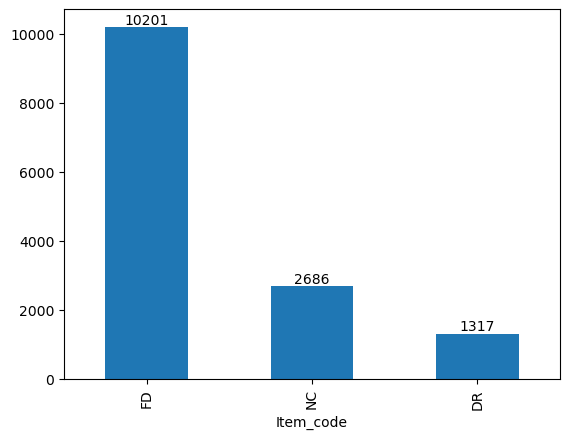

In [36]:
# value counts for categorical variables and there visualiztion
ax=combinedf.Item_code.value_counts().plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i,fmt="%0.0f",fontsize=10)

Item_Fat_Content
Low Fat       6499
Regular       5019
Non-Edible    2686
Name: count, dtype: int64


<Axes: ylabel='count'>

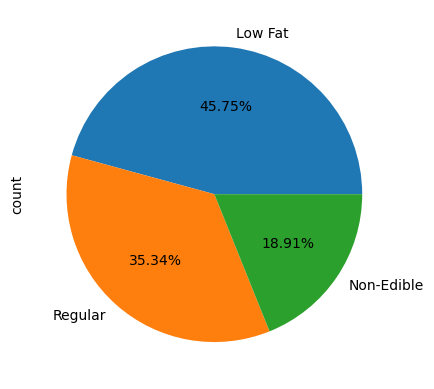

In [37]:
print(combinedf.Item_Fat_Content.value_counts())
combinedf.Item_Fat_Content.value_counts().plot(kind='pie',autopct='%.2f%%')

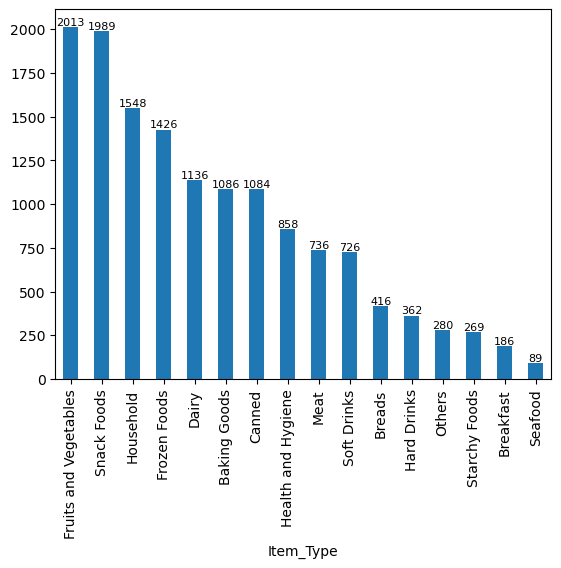

In [38]:
ax=combinedf.Item_Type.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i,fmt="%0.0f",fontsize=8)

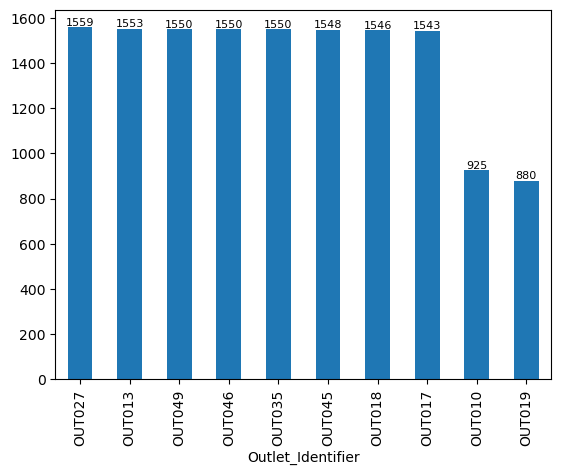

In [39]:
ax=combinedf.Outlet_Identifier.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i,fmt="%0.0f",fontsize=8)

Outlet_Size
Medium     4655
Missing    4016
Small      3980
High       1553
Name: count, dtype: int64


<Axes: ylabel='count'>

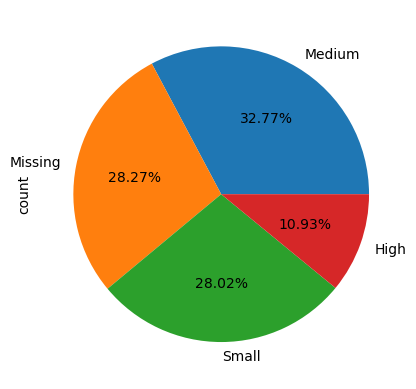

In [40]:
print(combinedf.Outlet_Size.value_counts())
combinedf.Outlet_Size.value_counts().plot(kind='pie',autopct='%.2f%%')

Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: count, dtype: int64


<Axes: ylabel='count'>

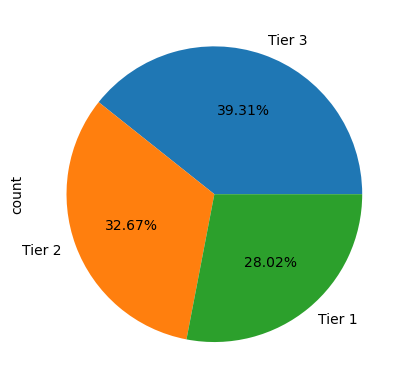

In [41]:
print(combinedf.Outlet_Location_Type.value_counts())
combinedf.Outlet_Location_Type.value_counts().plot(kind='pie',autopct='%.2f%%')

Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: count, dtype: int64


<Axes: ylabel='count'>

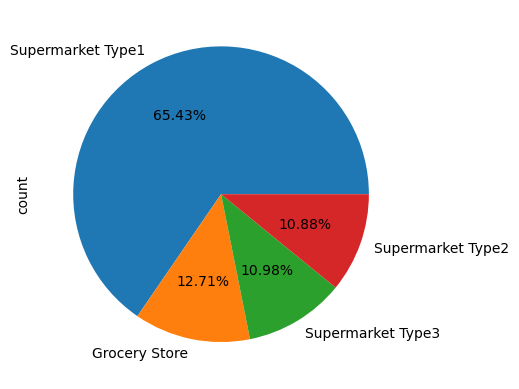

In [42]:
print(combinedf.Outlet_Type.value_counts())
combinedf.Outlet_Type.value_counts().plot(kind='pie',autopct='%.2f%%')

In [43]:
#crosstabulation
pd.crosstab(combinedf.Item_code,combinedf.Item_Fat_Content)

Item_Fat_Content,Low Fat,Non-Edible,Regular
Item_code,,,
DR,1208,0,109
FD,5291,0,4910
NC,0,2686,0


In [44]:
pd.crosstab(combinedf.Item_Type,combinedf.Item_Fat_Content)

Item_Fat_Content,Low Fat,Non-Edible,Regular
Item_Type,,,
Baking Goods,542,0,544
Breads,222,0,194
Breakfast,66,0,120
Canned,549,0,535
Dairy,691,0,445
Frozen Foods,731,0,695
Fruits and Vegetables,1086,0,927
Hard Drinks,362,0,0
Health and Hygiene,0,858,0


In [45]:
pd.crosstab(combinedf.Outlet_Size,combinedf.Outlet_Type)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,1553,0,0
Medium,0,1550,1546,1559
Missing,925,3091,0,0
Small,880,3100,0,0


In [46]:
pd.crosstab(combinedf.Outlet_Type,combinedf.Outlet_Location_Type)

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Type,,,
Grocery Store,880,0,925
Supermarket Type1,3100,4641,1553
Supermarket Type2,0,0,1546
Supermarket Type3,0,0,1559


In [47]:
#groupby mean
combinedf.Item_Weight.groupby(combinedf.Item_Type).mean()

Item_Type
Baking Goods             12.363868
Breads                   11.440236
Breakfast                13.108506
Canned                   12.418391
Dairy                    13.161885
Frozen Foods             12.608669
Fruits and Vegetables    13.125386
Hard Drinks              11.774498
Health and Hygiene       13.106384
Household                13.245362
Meat                     12.770792
Others                   13.707191
Seafood                  12.766131
Snack Foods              12.853421
Soft Drinks              11.958583
Starchy Foods            13.524405
Name: Item_Weight, dtype: float64

### Spliting data into numeric cols and object cols

We are spliting the data into numeric columns and object columns, to scale the data for numeric columns and imputing the dummies in object such each every data can be in 0's and 1's for building the Machine Learning models.

In [48]:
numcols=combinedf.select_dtypes(include=np.number)
objcols=combinedf.select_dtypes(include=['object'])

In [49]:
numcols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age'], dtype='object')

In [50]:
objcols.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_code'],
      dtype='object')

In [51]:
numcols.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,9.30,0.016047,249.8092,23
1,5.92,0.019278,48.2692,13
2,17.50,0.016760,141.6180,23
3,19.20,0.000000,182.0950,24
4,8.93,0.000000,53.8614,35


In [52]:
#standard scaler
from sklearn.preprocessing import StandardScaler

In [53]:
scaler=StandardScaler()

In [54]:
numcols_scaled=scaler.fit_transform(numcols)

In [55]:
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [56]:
numcols_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,-0.824939,-0.969852,1.752511,-0.139681
1,-1.623224,-0.907063,-1.493696,-1.334228
2,1.111729,-0.956000,0.009874,-0.139681
3,1.513233,-1.281712,0.661838,-0.020226
4,-0.912325,-1.281712,-1.403623,1.293777


In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
minmax=MinMaxScaler()

In [59]:
numcols_minmax=minmax.fit_transform(numcols)

In [60]:
numcols_minmax=pd.DataFrame(numcols_minmax,columns=numcols.columns)

In [61]:
numcols_minmax.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,0.282525,0.048866,0.927507,0.416667
1,0.081274,0.058705,0.072068,0.000000
2,0.770765,0.051037,0.468288,0.416667
3,0.871986,0.000000,0.640093,0.458333
4,0.260494,0.000000,0.095805,0.916667


In [62]:
from sklearn.preprocessing import RobustScaler

In [63]:
robust=RobustScaler()

In [64]:
numcols_robust=robust.fit_transform(numcols)

In [65]:
numcols_robust=pd.DataFrame(numcols_robust,columns=numcols.columns)

In [66]:
numcols_robust.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,-0.521322,-0.566751,1.171145,0.000000
1,-1.025799,-0.518530,-1.023237,-0.588235
2,0.702559,-0.556113,-0.006849,0.000000
3,0.956290,-0.806258,0.433868,0.058824
4,-0.576545,-0.806258,-0.962349,0.705882


<Axes: >

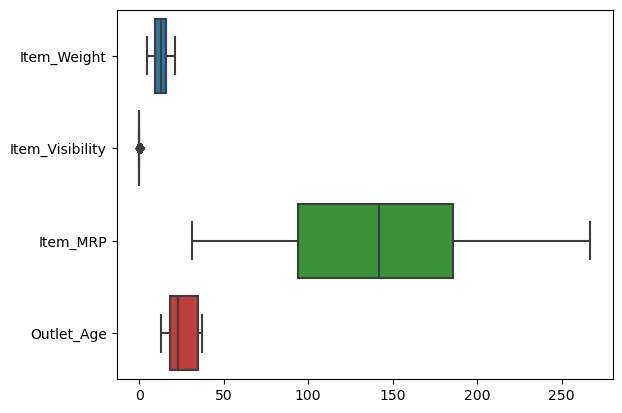

In [67]:
sns.boxplot(numcols,orient='h')

In [68]:
numcols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age'], dtype='object')

In [69]:
numcols.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
Item_Weight,1.000000,-0.013641,0.033002,-0.000462
Item_Visibility,-0.013641,1.000000,-0.006351,0.083678
Item_MRP,0.033002,-0.006351,1.000000,-0.000141
Outlet_Age,-0.000462,0.083678,-0.000141,1.000000


In [70]:
objcols.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_code'],
      dtype='object')

In [71]:
numcols.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,9.30,0.016047,249.8092,23
1,5.92,0.019278,48.2692,13
2,17.50,0.016760,141.6180,23
3,19.20,0.000000,182.0950,24
4,8.93,0.000000,53.8614,35


In [72]:
objcols.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_code'],
      dtype='object')

In [73]:
objcols_dummy=pd.get_dummies(objcols,columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'Item_code'])

In [74]:
objcols_dummy.head()

,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_code_DR,Item_code_FD,Item_code_NC
0,3735.138,True,False,False,False,False,False,False,True,False,...,True,False,False,False,True,False,False,False,True,False
1,443.4228,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
2,2097.27,True,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
3,732.38,False,False,True,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,True,False
4,994.7052,False,True,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True


In [75]:
objcols_dummy.replace({False:0,True:1},inplace=True)

In [76]:
objcols_dummy.head()

,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_code_DR,Item_code_FD,Item_code_NC
0,3735.138,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1,443.4228,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,2097.27,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,732.38,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,994.7052,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [77]:
objcols_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 5680
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Item_Outlet_Sales                14204 non-null  object
 1   Item_Fat_Content_Low Fat         14204 non-null  int64 
 2   Item_Fat_Content_Non-Edible      14204 non-null  int64 
 3   Item_Fat_Content_Regular         14204 non-null  int64 
 4   Item_Type_Baking Goods           14204 non-null  int64 
 5   Item_Type_Breads                 14204 non-null  int64 
 6   Item_Type_Breakfast              14204 non-null  int64 
 7   Item_Type_Canned                 14204 non-null  int64 
 8   Item_Type_Dairy                  14204 non-null  int64 
 9   Item_Type_Frozen Foods           14204 non-null  int64 
 10  Item_Type_Fruits and Vegetables  14204 non-null  int64 
 11  Item_Type_Hard Drinks            14204 non-null  int64 
 12  Item_Type_Health and Hygiene     14204

In [78]:
combinedf_clean=pd.concat([numcols_robust.reset_index(),objcols_dummy.reset_index().reset_index()],axis=1)
# I have used the RobustScaler for numerical variables for scaling.

In [79]:
combinedf_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            14204 non-null  int64  
 1   Item_Weight                      14204 non-null  float64
 2   Item_Visibility                  14204 non-null  float64
 3   Item_MRP                         14204 non-null  float64
 4   Outlet_Age                       14204 non-null  float64
 5   level_0                          14204 non-null  int64  
 6   index                            14204 non-null  int64  
 7   Item_Outlet_Sales                14204 non-null  object 
 8   Item_Fat_Content_Low Fat         14204 non-null  int64  
 9   Item_Fat_Content_Non-Edible      14204 non-null  int64  
 10  Item_Fat_Content_Regular         14204 non-null  int64  
 11  Item_Type_Baking Goods           14204 non-null  int64  
 12  Item_Type_Breads  

In [80]:
combinedf_clean.drop(['index','level_0'],axis=1,inplace=True)

In [81]:
combinedf_clean.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_code_DR,Item_code_FD,Item_code_NC
0,-0.521322,-0.566751,1.171145,0.000000,3735.138,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,-1.025799,-0.518530,-1.023237,-0.588235,443.4228,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
2,0.702559,-0.556113,-0.006849,0.000000,2097.27,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0.956290,-0.806258,0.433868,0.058824,732.38,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
4,-0.576545,-0.806258,-0.962349,0.705882,994.7052,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [82]:
#split data back to train and test 
salestrain_df=combinedf_clean[combinedf_clean.Item_Outlet_Sales!='test']
salestest_df=combinedf_clean[combinedf_clean.Item_Outlet_Sales=='test']

In [83]:
#split data back to train and test for EDA Hypothesis testing as this dataset doesn't have scaled numerical variables
#and dummies in categorical columns.
salestrain_EDA=combinedf[combinedf.Item_Outlet_Sales!='test']
salestest_EDA=combinedf[combinedf.Item_Outlet_Sales=='test']

In [84]:
salestrain_EDA.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_code
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.138,23,FD
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,13,DR
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.27,23,FD
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Missing,Tier 3,Grocery Store,732.38,24,FD
4,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,35,NC


In [85]:
salestrain_EDA.Item_Outlet_Sales=salestrain_EDA.Item_Outlet_Sales.astype('float64')

C:\Users\pisup\AppData\Local\Temp\ipykernel_21172\3615514951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salestrain_EDA.Item_Outlet_Sales=salestrain_EDA.Item_Outlet_Sales.astype('float64')


In [86]:
salestrain_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Identifier     8523 non-null   object 
 6   Outlet_Size           8523 non-null   object 
 7   Outlet_Location_Type  8523 non-null   object 
 8   Outlet_Type           8523 non-null   object 
 9   Item_Outlet_Sales     8523 non-null   float64
 10  Outlet_Age            8523 non-null   int64  
 11  Item_code             8523 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


###  Hypothesis Testing

In [87]:
#Hypothesis testing to find if there is a significant difference between Item_Outlet_Sales and Item_code
#groupby mean of  Item_Outlet_Sales and Item_code

salestrain_EDA.Item_Outlet_Sales.groupby(salestrain_EDA.Item_code).mean()

Item_code
DR    1997.333337
FD    2215.354223
NC    2142.721364
Name: Item_Outlet_Sales, dtype: float64

In [88]:
DR=salestrain_EDA[salestrain_EDA.Item_code=="DR"]
FD=salestrain_EDA[salestrain_EDA.Item_code=="FD"]
NC=salestrain_EDA[salestrain_EDA.Item_code=="NC"]

Null hypothesis - There is no significant difference between the two given variables. (p-values greater than 0.05)

Alternative Hypothesis - There is significant difference between the two given variables.(p-values less than 0.05)

In [89]:
#performing hypothesis testing using one way anova

from scipy.stats import f_oneway

In [90]:
f_oneway(DR.Item_Outlet_Sales,FD.Item_Outlet_Sales,NC.Item_Outlet_Sales)

# Since pvalue=0.0018844050713309338 is less than 0.05, Reject null Hypothesis

#Alternative Hypothesis True, there is significant difference of mean of Item_Outlet_Sales to Item_code

F_onewayResult(statistic=6.278765679145161, pvalue=0.0018844050713309338)

In [91]:
#Hypothesis testing to find if there is a significant difference between Item_Outlet_Sales and Outlet_Location_Type

salestrain_EDA.Item_Outlet_Sales.groupby(salestrain_EDA.Outlet_Location_Type).mean()

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

In [92]:
T1=salestrain_EDA[salestrain_EDA.Outlet_Location_Type=="Tier 1"]
T2=salestrain_EDA[salestrain_EDA.Outlet_Location_Type=="Tier 2"]
T3=salestrain_EDA[salestrain_EDA.Outlet_Location_Type=="Tier 3"]

In [93]:
f_oneway(T1.Item_Outlet_Sales,T2.Item_Outlet_Sales,T3.Item_Outlet_Sales)

# Since pvalue=5.2228172988842975e-24 is less than 0.05, Reject null Hypothesis

#Alternative Hypothesis True,there is significant difference of mean of Item_Outlet_Sales to Outlet_Location_Type

F_onewayResult(statistic=53.947739874560675, pvalue=5.2228172988842975e-24)

In [94]:
#To find the relationship between Item_Fat_Content and Item_Type we are doing chi2 test of hypothesis
from scipy.stats import chi2_contingency

Null hypothesis - There is no relationship between the two given variables. (p-values greater than 0.05)

Alternative Hypothesis - There is significant difference between the two given variables.(p-values less than 0.05)

In [95]:
chi2_contingency(pd.crosstab(salestrain_EDA.Item_Type,salestrain_EDA.Item_Fat_Content))

#Since the pvalue=0.0 is less than 0.05, reject null
# Alternative hyothesis ture, there is a relationship between Item_Fat_Content and Item_Type

Chi2ContingencyResult(statistic=9022.40827631828, pvalue=0.0, dof=30, expected_freq=array([[297.88384372, 121.57127772, 228.54487856],
       [115.38401971,  47.09010912,  88.52587117],
       [ 50.56670187,  20.63709961,  38.79619852],
       [298.34354101, 121.75888772, 228.89757128],
       [313.51355157, 127.9500176 , 240.53643083],
       [393.50087997, 160.59415699, 301.90496304],
       [566.34706089, 231.13551566, 434.51742344],
       [ 98.37521999,  40.14853925,  75.47624076],
       [239.04259064,  97.55719817, 183.40021119],
       [418.32453361, 170.7250968 , 320.95036959],
       [195.37134812,  79.7342485 , 149.89440338],
       [ 77.68884196,  31.70608941,  59.60506864],
       [ 29.42062654,  12.00703977,  22.57233369],
       [551.63674762, 225.13199578, 423.2312566 ],
       [204.56529391,  83.48644843, 156.94825766],
       [ 68.03519887,  27.76627948,  52.19852165]]))

In [96]:
#To find the relationship between Outlet_Size and Outlet_Type we are doing chi2 test of hypothesis

chi2_contingency(pd.crosstab(salestrain_EDA.Outlet_Size,salestrain_EDA.Outlet_Type))

#Since the pvalue=0.0 is less than 0.05, reject null
# Alternative hyothesis ture, there is a relationship between Outlet_Size and Outlet_Type

Chi2ContingencyResult(statistic=5380.286956123781, pvalue=0.0, dof=9, expected_freq=array([[ 118.42731433,  609.85146075,  101.47788337,  102.24334155],
       [ 354.90073918, 1827.59134108,  304.10700458,  306.40091517],
       [ 306.23372052, 1576.97641675,  262.40525637,  264.38460636],
       [ 303.43822598, 1562.58078141,  260.00985568,  261.97113692]]))

In [97]:
salestrain_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_code_DR,Item_code_FD,Item_code_NC
0,-0.521322,-0.566751,1.171145,0.000000,3735.138,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,-1.025799,-0.518530,-1.023237,-0.588235,443.4228,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
2,0.702559,-0.556113,-0.006849,0.000000,2097.27,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0.956290,-0.806258,0.433868,0.058824,732.38,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
4,-0.576545,-0.806258,-0.962349,0.705882,994.7052,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [98]:
salestest_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_code_DR,Item_code_FD,Item_code_NC
8523,1.187634,-0.693352,-0.374384,0.000000,test,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
8524,-0.670575,-0.232724,-0.598051,-0.470588,test,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
8525,0.269723,0.679900,1.083437,0.058824,test,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
8526,-0.817590,-0.576586,0.139226,-0.470588,test,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
8527,0.000000,0.963840,1.001518,0.823529,test,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [99]:
salestrain_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, 0 to 8522
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Age                       8523 non-null   float64
 4   Item_Outlet_Sales                8523 non-null   object 
 5   Item_Fat_Content_Low Fat         8523 non-null   int64  
 6   Item_Fat_Content_Non-Edible      8523 non-null   int64  
 7   Item_Fat_Content_Regular         8523 non-null   int64  
 8   Item_Type_Baking Goods           8523 non-null   int64  
 9   Item_Type_Breads                 8523 non-null   int64  
 10  Item_Type_Breakfast              8523 non-null   int64  
 11  Item_Type_Canned                 8523 non-null   int64  
 12  Item_Type_Dairy          

In [100]:
salestest_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5681 entries, 8523 to 14203
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      5681 non-null   float64
 1   Item_Visibility                  5681 non-null   float64
 2   Item_MRP                         5681 non-null   float64
 3   Outlet_Age                       5681 non-null   float64
 4   Item_Outlet_Sales                5681 non-null   object 
 5   Item_Fat_Content_Low Fat         5681 non-null   int64  
 6   Item_Fat_Content_Non-Edible      5681 non-null   int64  
 7   Item_Fat_Content_Regular         5681 non-null   int64  
 8   Item_Type_Baking Goods           5681 non-null   int64  
 9   Item_Type_Breads                 5681 non-null   int64  
 10  Item_Type_Breakfast              5681 non-null   int64  
 11  Item_Type_Canned                 5681 non-null   int64  
 12  Item_Type_Dairy      

In [101]:
#Delete Item_Outlet_sales from salestest_df
salestest_df=salestest_df.drop('Item_Outlet_Sales',axis=1)

In [102]:
salestest_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5681 entries, 8523 to 14203
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      5681 non-null   float64
 1   Item_Visibility                  5681 non-null   float64
 2   Item_MRP                         5681 non-null   float64
 3   Outlet_Age                       5681 non-null   float64
 4   Item_Fat_Content_Low Fat         5681 non-null   int64  
 5   Item_Fat_Content_Non-Edible      5681 non-null   int64  
 6   Item_Fat_Content_Regular         5681 non-null   int64  
 7   Item_Type_Baking Goods           5681 non-null   int64  
 8   Item_Type_Breads                 5681 non-null   int64  
 9   Item_Type_Breakfast              5681 non-null   int64  
 10  Item_Type_Canned                 5681 non-null   int64  
 11  Item_Type_Dairy                  5681 non-null   int64  
 12  Item_Type_Frozen Food

In [103]:
salestrain_df.Item_Outlet_Sales=salestrain_df.Item_Outlet_Sales.astype('float64')

C:\Users\pisup\AppData\Local\Temp\ipykernel_21172\560551408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salestrain_df.Item_Outlet_Sales=salestrain_df.Item_Outlet_Sales.astype('float64')


In [104]:
salestrain_df.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

<Axes: ylabel='Density'>

<Figure size 3000x1500 with 0 Axes>

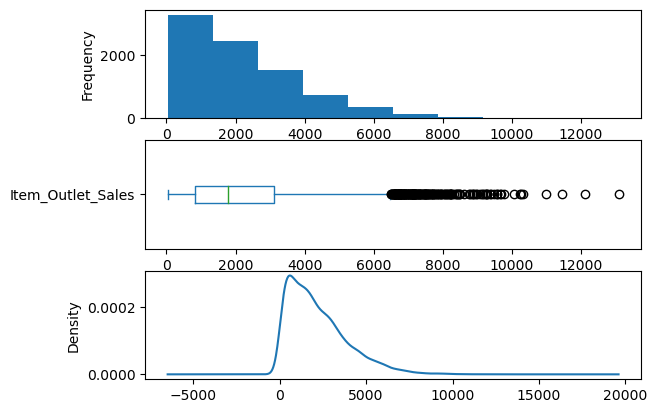

In [105]:
#hitogram,Boxplot,and density curve
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
salestrain_df.Item_Outlet_Sales.plot(kind='hist',ax=ax[0])
salestrain_df.Item_Outlet_Sales.plot(kind='box',vert=False,ax=ax[1])
salestrain_df.Item_Outlet_Sales.plot(kind='kde',ax=ax[2])

In [106]:
#spliting data into 2 ways which having dependent and independent variables (split data into dependent variable(y) & independent variables(x's))
y=salestrain_df.Item_Outlet_Sales
x=salestrain_df.drop('Item_Outlet_Sales',axis=1)

<Axes: ylabel='Density'>

<Figure size 3000x1500 with 0 Axes>

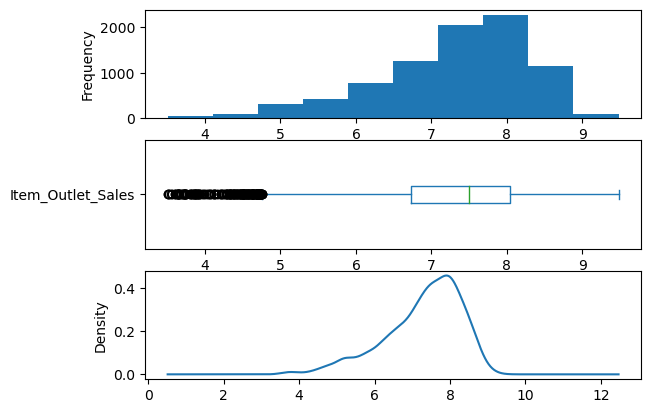

In [107]:
#To achieve normality of the residuals, we apply the log transformation to our dependent variable, which has a 
#positive skew. This reduces the effect of outliers and improves the fit of the linear model.

plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
np.log(y).plot(kind='hist',ax=ax[0])
np.log(y).plot(kind='box',vert=False,ax=ax[1])
np.log(y).plot(kind='kde',ax=ax[2])

In [108]:
x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_code_DR,Item_code_FD,Item_code_NC
0,-0.521322,-0.566751,1.171145,0.000000,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,-1.025799,-0.518530,-1.023237,-0.588235,0,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,0.702559,-0.556113,-0.006849,0.000000,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0.956290,-0.806258,0.433868,0.058824,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,-0.576545,-0.806258,-0.962349,0.705882,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


### Building the Models

### Linear Regression

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
lrmodel=LinearRegression()

In [111]:
lrmodel=lrmodel.fit(x,np.log(y))

In [112]:
lrmodel.score(x,np.log(y))

0.7213876943174335

In [113]:
lrpredict=lrmodel.predict(x)

In [114]:
lrresid=y-lrpredict

In [115]:
np.sqrt(np.mean(lrresid**2))

2763.3203381308235

In [116]:
lrtestpredict=lrmodel.predict(salestest_df)

In [117]:
lrtestpredict=np.exp(lrtestpredict)
#Since our dependent variable (y) is log-transformed, we need to apply the exponential function to convert our 
#predictions from log scale to normal scale.

In [118]:
pd.DataFrame(lrtestpredict).to_csv('lrmodel.csv')

### Decision Tree

In [119]:
from sklearn.tree import DecisionTreeRegressor

In [120]:
dtree=DecisionTreeRegressor(max_depth=8)

In [121]:
dtree=dtree.fit(x,np.log(y))

In [122]:
dtree.score(x,np.log(y))

0.7681075272318065

In [123]:
dtreepredict=dtree.predict(x)

In [124]:
dtreeresid=y-dtreepredict

In [125]:
np.sqrt(np.mean(dtreeresid**2))

2763.3110787250403

In [126]:
treetestpred=dtree.predict(salestest_df)

In [127]:
treetestpred=np.exp(treetestpred)
#Since our dependent variable (y) is log-transformed, we need to apply the exponential function to convert our 
#predictions from log scale to normal scale.

In [128]:
pd.DataFrame(treetestpred).to_csv('Dtree.csv')

###  Random Forest

In [129]:
from sklearn.ensemble import RandomForestRegressor

In [130]:
RF=RandomForestRegressor(max_depth=7,n_estimators=5000)

In [131]:
RFmodel=RF.fit(x,np.log(y))
#To achieve normality of the residuals, we apply the log transformation to our dependent variable, which has a 
#positive skew. This reduces the effect of outliers and improves the fit of the linear model.

In [132]:
RFmodel.score(x,np.log(y))

0.765785491208848

In [133]:
rfpredict=RFmodel.predict(x)

In [134]:
rfresid=y-rfpredict

In [135]:
np.sqrt(np.mean(rfresid**2))

2763.316161983151

In [136]:
RFtestpredict=RFmodel.predict(salestest_df)

In [137]:
RFtestpredict=np.exp(RFtestpredict)
#Since our dependent variable (y) is log-transformed, we need to apply the exponential function to convert our 
#predictions from log scale to normal scale.

In [138]:
pd.DataFrame(RFtestpredict).to_csv('RF.csv')

### GBM

In [139]:
from sklearn.ensemble import GradientBoostingRegressor

In [140]:
gbm=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)

In [141]:
gbmmodel=gbm.fit(x,np.log(y))
#To achieve normality of the residuals, we apply the log transformation to our dependent variable, which has a 
#positive skew. This reduces the effect of outliers and improves the fit of the linear model.

In [142]:
gbmmodel.score(x,np.log(y))

0.7555382397657535

In [143]:
gbmpredict=gbmmodel.predict(x)

In [144]:
gbmpredict=np.exp(gbmpredict)

In [145]:
gbmresid=y-gbmpredict

In [146]:
np.sqrt(np.mean(gbmresid**2))

1083.1388810411954

In [147]:
GBMtestpredict=gbmmodel.predict(salestest_df)

In [148]:
GBMtestpredict=np.exp(GBMtestpredict)
#Since our dependent variable (y) is log-transformed, we need to apply the exponential function to convert our 
#predictions from log scale to normal scale.

In [149]:
pd.DataFrame(GBMtestpredict).to_csv('GBM.csv')

### SVR

In [150]:
from sklearn.svm import SVR

In [151]:
svr=SVR(kernel='linear', C=100)

In [152]:
svrmodel=svr.fit(x,np.log(y))
#To achieve normality of the residuals, we apply the log transformation to our dependent variable, which has a 
#positive skew. This reduces the effect of outliers and improves the fit of the linear model.

In [153]:
svrmodel.score(x,np.log(y))

0.7166926407787446

In [154]:
svrpredict=svrmodel.predict(x)

In [155]:
svrpredict=np.exp(svrpredict)

In [156]:
svrresid=y-svrpredict

In [157]:
np.sqrt(np.mean(svrresid**2))

1135.0064754879943

In [158]:
svrtestpredict=svrmodel.predict(salestest_df)

In [159]:
svrtestpredict=np.exp(svrtestpredict)
#Since our dependent variable (y) is log-transformed, we need to apply the exponential function to convert our 
#predictions from log scale to normal scale.

In [172]:
pd.DataFrame(svrtestpredict).to_csv('svr.csv')

### KNN Regression

In [161]:
from sklearn.neighbors import KNeighborsRegressor

In [162]:
knn=KNeighborsRegressor(n_neighbors=5)

In [163]:
knnmodel=knn.fit(x,np.log(y))
#To achieve normality of the residuals, we apply the log transformation to our dependent variable, which has a 
#positive skew. This reduces the effect of outliers and improves the fit of the linear model.

In [164]:
knnmodel.score(x,np.log(y))

0.763546184334263

In [165]:
knnpredict=knnmodel.predict(x)

In [166]:
knnpredict=np.exp(knnpredict)

In [167]:
knnresid=y-knnpredict

In [168]:
np.sqrt(np.mean(knnresid**2))

1046.8056299612163

In [169]:
knntestpredict=knnmodel.predict(salestest_df)

In [170]:
knntestpredict=np.exp(knntestpredict)
#Since our dependent variable (y) is log-transformed, we need to apply the exponential function to convert our 
#predictions from log scale to normal scale.

In [171]:
pd.DataFrame(knntestpredict).to_csv('knn.csv')

###  Summary

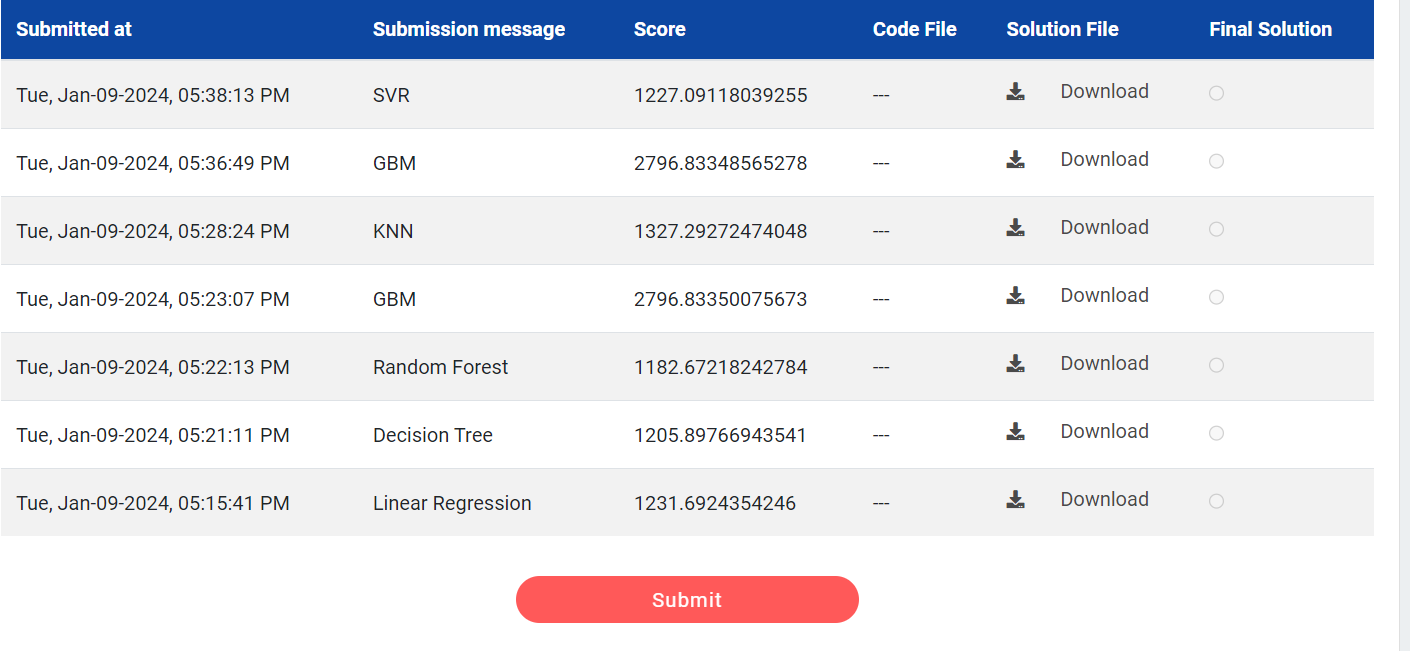

In this summary, I will present the results of our machine learning project on the Big Mart Sales dataset, which contains information about the sales of various products across different outlets. Our goal was to build and evaluate different machine learning models that can predict the sales of a product given its features and the outlet characteristics. We used various regression techniques, such as linear regression, decision tree, random forest, gradient boosting machines, support vector regression, and KNN regression, and compared their performance using two metrics: accuracyscore and root mean squared error (RMSE).

Accuracy score measures how often the model predicts the correct sales value, while RMSE measures how far the predictions are from the actual sales values. A higher accuracy score and a lower RMSE indicatea better model performance. We split the dataset into training and testing sets, trained each model on the training set, and evaluated them on the testing set. The Values below summarizes the results of our analysis:


    MODEL                          R_Square Score            Accuracy Score            RMSE

    Linear Regression            0.7213876943174335        1231.6924354246            2763.3203381308235

    Decision Tree                0.7681075272318065        1205.89766943541           2763.3110787250403

    Random Forest                0.765785491208848         1182.67218242784           2763.316161983151

    Gradient Boosting Machine    0.7555382397657535        2796.83348565278           1083.1388810411954

    Support Vector Regression    0.7166926407787446        1227.09118039255           1135.0064754879943

    KNN Regression               0.763546184334263         1327.29272474048           1046.8056299612163

As we can see from the table, the KNN Regression model outperforms the other models in terms of RMSE, which is the most important metric for regression problems.

The accuracy score of the KNN Regression model is slightly higher than some of the other models, such as the Decision Tree and Random Forest models, but this is not a major concern, as accuracy score is not a very reliable metric for regression problems. Accuracy score only tells us how many predictions are exactly equal to the actual sales values, but it does not tell us how close or far they are.

Therefore, we recommend using the KNN Regression model for predicting the sales of products in the Big Mart Sales dataset, as it has the lowest RMSE and thus the highest predictive power among the models we tested. 